# 1. Import Necessary Libraries
This block imports all the required libraries for data manipulation, data visualization, and basic statistics.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define File Path
file_path = "/Users/krista.rime/Documents/AIML/capstone_project.csv"


# 2. Load Data
This block reads the CSV file into a DataFrame and displays basic information about the dataset.

In [26]:
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("First few rows of the dataset:")
print(df.head())

# Display basic information about the DataFrame
print("\nBasic information about the dataset:")
print(df.info())

# Display summary statistics of the DataFrame
print("\nSummary statistics of the dataset:")
print(df.describe())


First few rows of the dataset:
   HIT_ID   EVENT_OCCURRED_UTC APP_NAME  \
0      59  2024-04-02 00:07:35     roku   
1      91  2024-04-02 00:08:33     roku   
2      97  2024-04-02 00:08:35     roku   
3      73  2024-04-02 00:11:15     roku   
4      28  2024-04-02 00:11:55     roku   

                                       APP_VERSION  \
0  5.33.5-d1bde25c896954a4820cb95376a0eed925b5a4d9   
1  5.33.5-d1bde25c896954a4820cb95376a0eed925b5a4d9   
2  5.33.5-d1bde25c896954a4820cb95376a0eed925b5a4d9   
3  5.33.5-d1bde25c896954a4820cb95376a0eed925b5a4d9   
4  5.33.5-d1bde25c896954a4820cb95376a0eed925b5a4d9   

                              CLIENT_ID                            SESSION_ID  \
0  50a3132f-7f4e-5c51-8746-160e3619e35e  cc1ff065-f855-11ee-9c2a-cef0d3e1cfbb   
1  b2dcd972-823b-5b14-a294-ce30a7929caf  e4cb78f1-f084-11ee-8dec-6e7faad1f3b0   
2  50a3132f-7f4e-5c51-8746-160e3619e35e  cc1ff065-f855-11ee-9c2a-cef0d3e1cfbb   
3  50a3132f-7f4e-5c51-8746-160e3619e35e  cc1ff065-f855-11ee-9

# 3. Check for Missing Values
This block checks for missing values in the dataset and displays the count of missing values for each column.


Count of missing values for each column:
HIT_ID                0
EVENT_OCCURRED_UTC    0
APP_NAME              0
APP_VERSION           0
CLIENT_ID             0
SESSION_ID            0
EVENTNAME             0
dtype: int64


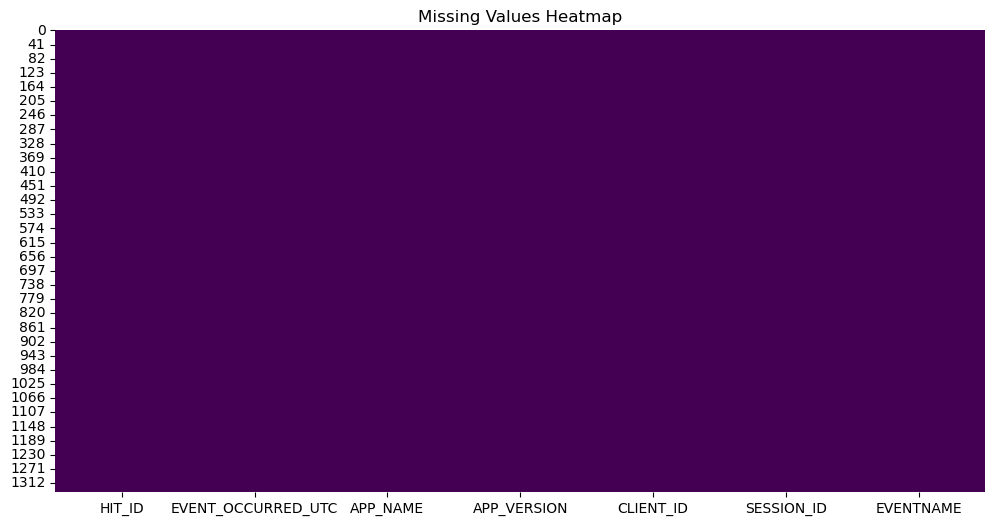

In [27]:

# Check for missing values
missing_values = df.isnull().sum()

print("\nCount of missing values for each column:")
print(missing_values)

# Visualize missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


# 4. Convert Date Columns
This block converts date columns to datetime format and extracts additional time-related features.

In [29]:
# Convert 'EVENT_OCCURRED_UTC' to datetime format
df['EVENT_OCCURRED_UTC'] = pd.to_datetime(df['EVENT_OCCURRED_UTC'])

# Extract additional time-related features
df['year'] = df['EVENT_OCCURRED_UTC'].dt.year
df['month'] = df['EVENT_OCCURRED_UTC'].dt.month
df['day'] = df['EVENT_OCCURRED_UTC'].dt.day
df['hour'] = df['EVENT_OCCURRED_UTC'].dt.hour
df['minute'] = df['EVENT_OCCURRED_UTC'].dt.minute
df['second'] = df['EVENT_OCCURRED_UTC'].dt.second

# Display the first few rows after adding time-related features
print("\nFirst few rows after adding time-related features:")
print(df.head())


First few rows after adding time-related features:
   HIT_ID  EVENT_OCCURRED_UTC APP_NAME  \
0      59 2024-04-02 00:07:35     roku   
1      91 2024-04-02 00:08:33     roku   
2      97 2024-04-02 00:08:35     roku   
3      73 2024-04-02 00:11:15     roku   
4      28 2024-04-02 00:11:55     roku   

                                       APP_VERSION  \
0  5.33.5-d1bde25c896954a4820cb95376a0eed925b5a4d9   
1  5.33.5-d1bde25c896954a4820cb95376a0eed925b5a4d9   
2  5.33.5-d1bde25c896954a4820cb95376a0eed925b5a4d9   
3  5.33.5-d1bde25c896954a4820cb95376a0eed925b5a4d9   
4  5.33.5-d1bde25c896954a4820cb95376a0eed925b5a4d9   

                              CLIENT_ID                            SESSION_ID  \
0  50a3132f-7f4e-5c51-8746-160e3619e35e  cc1ff065-f855-11ee-9c2a-cef0d3e1cfbb   
1  b2dcd972-823b-5b14-a294-ce30a7929caf  e4cb78f1-f084-11ee-8dec-6e7faad1f3b0   
2  50a3132f-7f4e-5c51-8746-160e3619e35e  cc1ff065-f855-11ee-9c2a-cef0d3e1cfbb   
3  50a3132f-7f4e-5c51-8746-160e3619e35e  cc1ff

# 5. Visualize Data Distribution
This block visualizes the distribution of key features using histograms and boxplots.

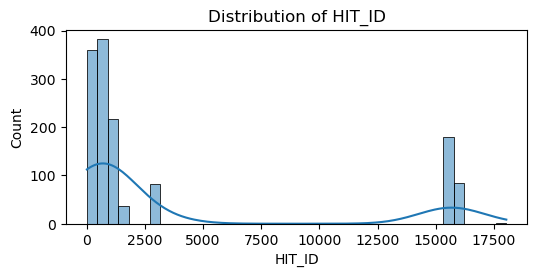

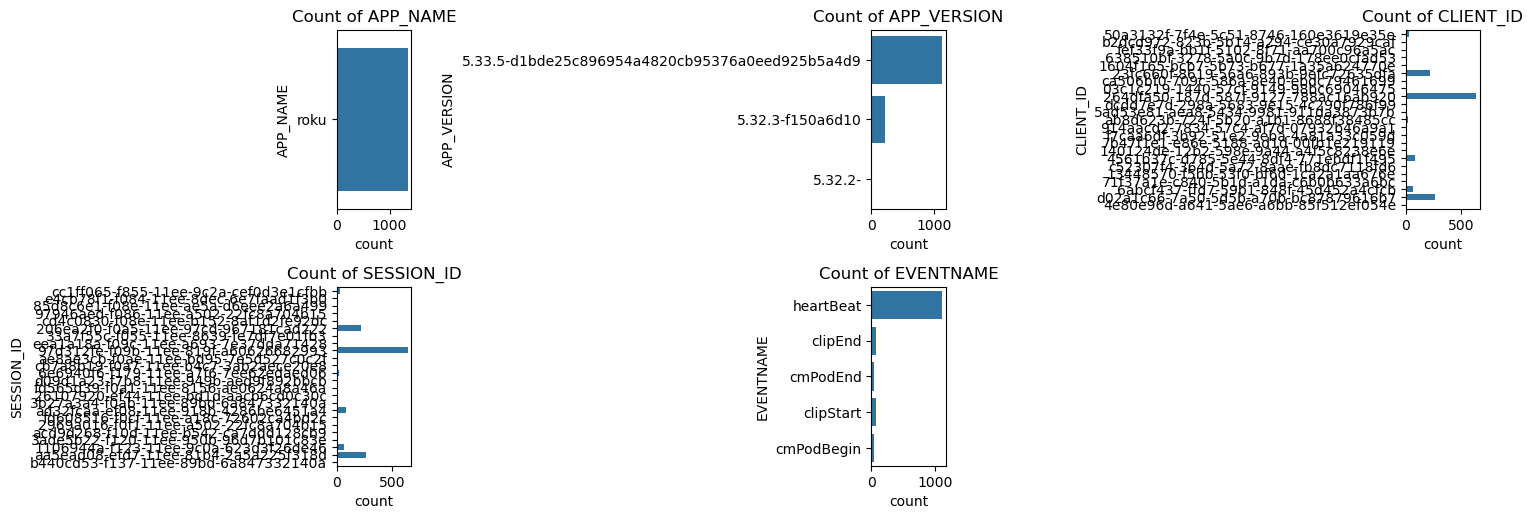

In [31]:
# Visualize the distribution of numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Visualize the distribution of categorical features
categorical_features = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 3, i + 1)
    sns.countplot(y=df[feature])
    plt.title(f'Count of {feature}')
plt.tight_layout()
plt.show()


# 6. Correlation Analysis
This block calculates and visualizes the correlation matrix of the numerical features.

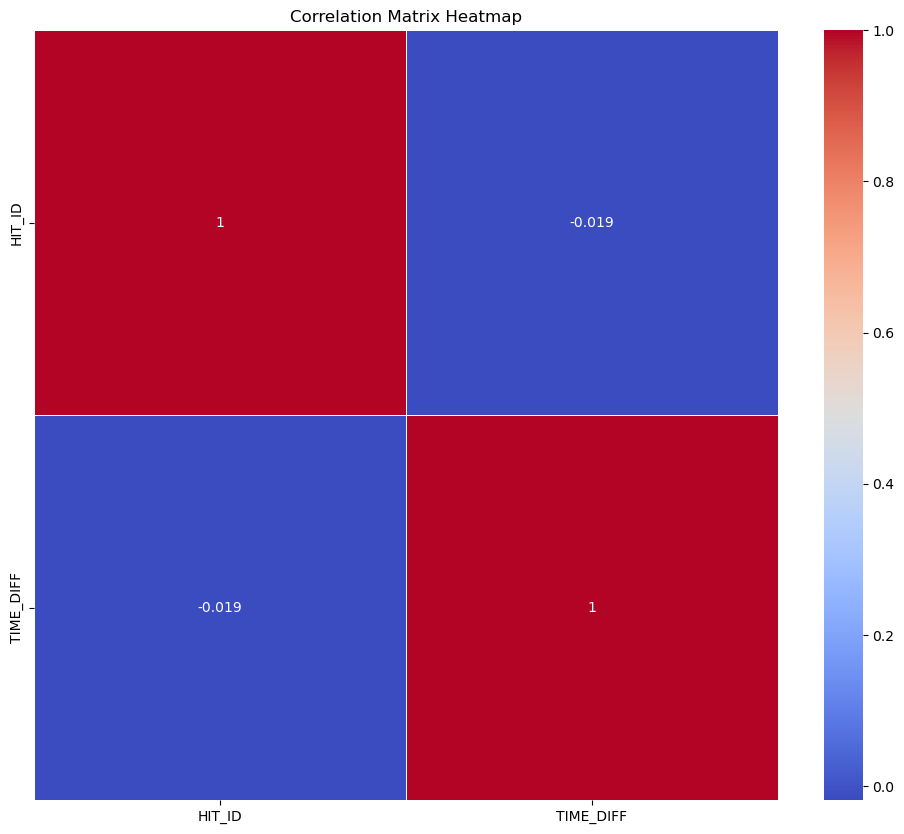

In [37]:
# Select only numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



# 7. Identify Unique Values
This block identifies and displays the unique values for key features.

In [33]:
# Identify unique values in key features
key_features = ['CLIENT_ID', 'SESSION_ID', 'EVENTNAME', 'APP_NAME']

for feature in key_features:
    unique_values = df[feature].unique()
    print(f"\nUnique values in {feature} (Total: {len(unique_values)}):")
    print(unique_values)


Unique values in CLIENT_ID (Total: 23):
['50a3132f-7f4e-5c51-8746-160e3619e35e'
 'b2dcd972-823b-5b14-a294-ce30a7929caf'
 'fef33f9a-bb1f-5102-8f71-aa700c96a5ac'
 '638510bf-3278-5a0c-9b7d-178ee0cfad53'
 '1604f165-bcb7-5b73-b677-1a35a624770e'
 '23fc660f-8619-56a6-893b-9efc72635dfa'
 'ca506bf0-709c-586a-8e40-ebdc79461699'
 '03c1c219-1440-57cf-9149-98bc69046475'
 '264dfa50-187d-587f-9127-788ac16ab920'
 'dcdd7e7d-298a-5683-9e15-4c290f786f99'
 '5ad53e81-aea8-5434-9981-911da3873b7b'
 'ab8d623b-724f-5b20-a1b1-8688f38485cc'
 '914aacd2-7834-57c4-af7d-07932b46a9a1'
 'f7caa6df-3b92-51e2-9eba-4a81a33c059d'
 '7b47f1e1-e86e-5188-ad1d-00fb1e219119'
 '140124de-12b2-598e-9a44-a4f5c8238e6e'
 '4561b37c-d785-5e44-8df4-771ebdf1f495'
 'c52307f4-364d-5a72-8aae-fb8dc7118fd6'
 '13448570-f5bb-53f0-bf6d-1ca2a1aa676e'
 '71f37a1e-c840-5b1d-a1da-c6b0b633a6bc'
 '6abcf437-ffd7-59b1-848f-45d452a4cfcb'
 'd02a1c66-7a50-5d5b-a70b-bc87879616b7'
 '4e80e96d-a641-5ae6-a6bb-85f512ef054e']

Unique values in SESSION_ID (Total: 2

# 8. Analyze Event Sequences
This block analyzes the sequences of events within each session.

In [34]:
# Group by CLIENT_ID and SESSION_ID
grouped = df.groupby(['CLIENT_ID', 'SESSION_ID'])

# Display the first few sequences
for name, group in grouped:
    print(f"\nSequence for CLIENT_ID={name[0]}, SESSION_ID={name[1]}:")
    print(group[['EVENT_OCCURRED_UTC', 'EVENTNAME']].head())
    break  # Remove this break to see all sequences



Sequence for CLIENT_ID=03c1c219-1440-57cf-9149-98bc69046475, SESSION_ID=eea1a18a-f09c-11ee-a693-7e37dda71428:
    EVENT_OCCURRED_UTC EVENTNAME
54 2024-04-02 04:03:39  cmPodEnd


# 9. Summary Statistics for Time Differences
This block calculates and displays summary statistics for time differences between consecutive events.


Summary statistics for time differences between events:
count     1339.000000
mean        64.184466
std        627.526238
min          0.000000
25%          9.000000
50%         20.000000
75%         20.000000
max      14551.000000
Name: TIME_DIFF, dtype: float64


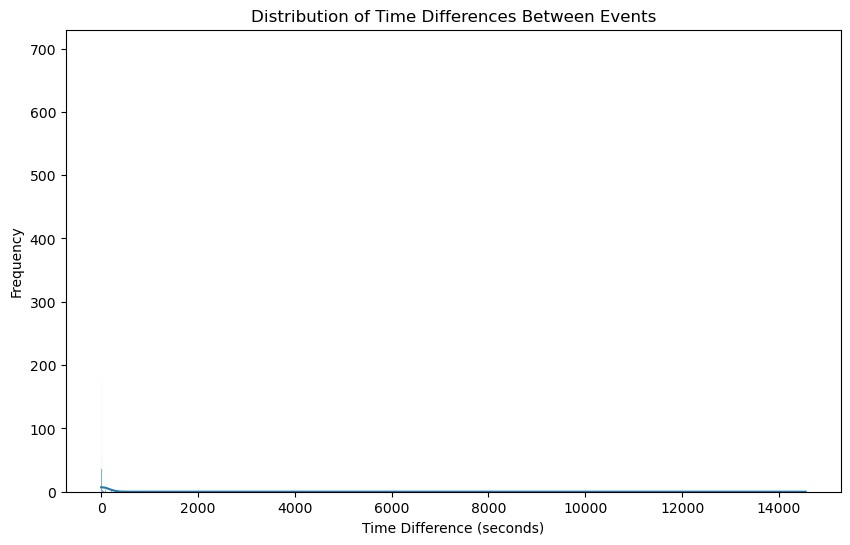

In [36]:
# Calculate time differences between consecutive events
df['TIME_DIFF'] = df['EVENT_OCCURRED_UTC'].diff().fillna(pd.Timedelta(seconds=0)).apply(lambda x: x.total_seconds())

# Display summary statistics for time differences
print("\nSummary statistics for time differences between events:")
print(df['TIME_DIFF'].describe())

# Visualize the distribution of time differences
plt.figure(figsize=(10, 6))
sns.histplot(df['TIME_DIFF'], kde=True)
plt.title('Distribution of Time Differences Between Events')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.show()

# Summary Overview and Findings for Data Discovery

## 1. Overview
The data discovery process involves importing, inspecting, and understanding the structure and characteristics of the dataset. The primary objective is to prepare the data for subsequent modeling tasks by ensuring it is clean, well-structured, and adequately preprocessed.

## 2. Data Inspection
The dataset contains information about events, including details such as the event occurrence time, application name, application version, client ID, session ID, and event name. Here are the key steps and findings from the data inspection:

### First Few Rows of the Dataset:
The dataset includes columns such as `HIT_ID`, `EVENT_OCCURRED_UTC`, `APP_NAME`, `APP_VERSION`, `CLIENT_ID`, `SESSION_ID`, and `EVENTNAME`. The first few rows show repetitive `APP_NAME` as "roku" and `EVENTNAME` values like "heartBeat", "clipEnd", "cmPodEnd", etc.

### Basic Information:
- The dataset has 1339 entries and 7 columns.
- All columns have non-null values.
- The `HIT_ID` column is an integer, while the other columns are objects (strings).

### Summary Statistics:
- The `HIT_ID` ranges from 3 to 18036.
- Most numerical columns are descriptive statistics (mean, std, min, max, etc.).

## 3. Checking for Missing Values
The dataset does not contain any missing values across all columns. This is verified using the `.isnull().sum()` method and visualized with a heatmap.

## 4. Converting Date Columns
The `EVENT_OCCURRED_UTC` column is converted to datetime format. Additional time-related features like year, month, day, hour, minute, and second are extracted to facilitate temporal analysis.

## 5. Data Distribution Visualization
The distribution of numerical features (`HIT_ID`) is visualized using histograms. Categorical features (`APP_NAME`, `APP_VERSION`, `CLIENT_ID`, `SESSION_ID`, `EVENTNAME`) are visualized using count plots to understand their frequency distribution.

## 6. Correlation Analysis
A correlation matrix is computed and visualized using a heatmap to understand the relationships between numerical features. However, since most features are categorical, the correlation matrix primarily focuses on `HIT_ID`.

## 7. Identifying Unique Values
Unique values in key features are identified:
- `CLIENT_ID`: 23 unique values
- `SESSION_ID`: 24 unique values
- `EVENTNAME`: 5 unique values (heartBeat, clipEnd, cmPodEnd, clipStart, cmPodBegin)
- `APP_NAME`: 1 unique value ("roku")

## 8. Event Sequence Analysis
Sequences of events within each session are analyzed to understand the order and types of events occurring within sessions. This is crucial for detecting anomalies or patterns in event sequences.

## 9. Time Difference Analysis
Time differences between consecutive events are calculated and summarized. This helps in understanding the temporal spacing of events, which is critical for identifying out-of-sequence events. The summary statistics for time differences show a mean of 64.18 seconds and a maximum of 14551 seconds.

# Key Findings
1. **Data Completeness:** The dataset is complete with no missing values.
2. **Temporal Features:** Converting and extracting temporal features provides additional context for each event.
3. **Categorical Distribution:** Most categorical features have a limited number of unique values, indicating a controlled environment (e.g., a single app name).
4. **Event Sequences:** Analyzing event sequences is essential for understanding the flow of events and identifying any irregularities.
5. **Time Differences:** Significant variations in time differences between events suggest potential areas for further investigation, especially for heartbeat events that should have consistent intervals.

# Next Steps
The insights gained from the data discovery phase set the stage for more advanced modeling tasks. The next steps would involve:
1. **Feature Engineering:** Creating and refining features that capture the essence of event sequences and their timing.
2. **Model Building:** Developing models to detect out-of-sequence events, focusing on heartbeat intervals.
3. **Evaluation:** Rigorous evaluation of models to ensure accuracy and reliability in detecting anomalies in event sequences.
